데이콘 Basic 전화 해지 여부 분류 AI 경진대회

# 데이터 전처리

## 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from scipy import stats
%config InlineBackend.figure_format = 'retina'

In [2]:
train = pd.read_csv('../data/dacon/train.csv')
print(train.shape)
train.head()

(30200, 14)


,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [3]:
test = pd.read_csv('../data/dacon/test.csv')
print(test.shape)
test.head()

(12943, 13)


,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
0,TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
1,TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0
2,TEST_00002,34,1,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2
3,TEST_00003,209,86,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6
4,TEST_00004,202,0,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2


## 데이터 확인

In [5]:
train.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


In [6]:
test.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
count,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000,12943.000000
mean,159.776713,12.312756,251.066221,159.761724,40.887059,263.656424,159.628216,25.440460,264.052963,157.692112,12.095035,2.301476
std,118.383432,28.069438,85.236623,103.648878,23.062830,75.232035,103.417132,8.288719,74.877379,101.640429,9.459368,2.058855
min,2.000000,0.000000,0.200000,0.000000,0.100000,0.200000,0.000000,0.000000,21.300000,20.000000,2.000000,0.000000
25%,63.000000,0.000000,222.700000,88.000000,24.400000,223.800000,87.000000,22.220000,223.700000,86.000000,4.880000,2.000000
50%,119.000000,1.000000,234.000000,115.000000,30.800000,242.700000,113.000000,23.300000,242.800000,111.000000,9.060000,2.000000
75%,228.000000,22.000000,289.800000,223.000000,45.900000,290.350000,223.000000,28.820000,290.700000,223.000000,20.290000,2.000000
max,2212.000000,1112.000000,481.800000,489.000000,118.100000,481.500000,490.000000,49.990000,481.700000,489.000000,44.980000,11.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12943 entries, 0 to 12942
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       12943 non-null  object 
 1   가입일      12943 non-null  int64  
 2   음성사서함이용  12943 non-null  int64  
 3   주간통화시간   12943 non-null  float64
 4   주간통화횟수   12943 non-null  int64  
 5   주간통화요금   12943 non-null  float64
 6   저녁통화시간   12943 non-null  float64
 7   저녁통화횟수   12943 non-null  int64  
 8   저녁통화요금   12943 non-null  float64
 9   밤통화시간    12943 non-null  float64
 10  밤통화횟수    12943 non-null  int64  
 11  밤통화요금    12943 non-null  float64
 12  상담전화건수   12943 non-null  int64  
dtypes: float64(6), int64(6), object(1)
memory usage: 1.3+ MB


In [12]:
corr = train.corr(numeric_only=True)
corr

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
가입일,1.000000,0.069771,0.190535,0.128138,0.118500,0.223365,0.119532,0.208486,0.256722,0.111628,0.064803,0.073547,0.006688
음성사서함이용,0.069771,1.000000,0.045449,0.031312,0.070361,0.067955,0.039927,0.065085,0.068964,0.052887,0.025955,0.010326,-0.062734
주간통화시간,0.190535,0.045449,1.000000,0.213815,0.336852,0.493299,0.239448,0.483473,0.508642,0.238676,0.177415,0.158215,0.029975
주간통화횟수,0.128138,0.031312,0.213815,1.000000,0.100227,0.265814,0.147605,0.247990,0.289059,0.109052,0.102214,0.072544,0.010974
주간통화요금,0.118500,0.070361,0.336852,0.100227,1.000000,0.219930,0.098014,0.216840,0.219115,0.126778,0.075288,0.102932,-0.071006
저녁통화시간,0.223365,0.067955,0.493299,0.265814,0.219930,1.000000,0.280098,0.806827,0.605980,0.276678,0.210535,0.189158,-0.000163
저녁통화횟수,0.119532,0.039927,0.239448,0.147605,0.098014,0.280098,1.000000,0.278620,0.277744,0.135633,0.094207,0.080626,-0.004276
저녁통화요금,0.208486,0.065085,0.483473,0.247990,0.216840,0.806827,0.278620,1.000000,0.580330,0.272802,0.204482,0.189227,0.001711
밤통화시간,0.256722,0.068964,0.508642,0.289059,0.219115,0.605980,0.277744,0.580330,1.000000,0.286981,0.305315,0.191133,-0.002872
밤통화횟수,0.111628,0.052887,0.238676,0.109052,0.126778,0.276678,0.135633,0.272802,0.286981,1.000000,0.083941,0.083491,-0.003121


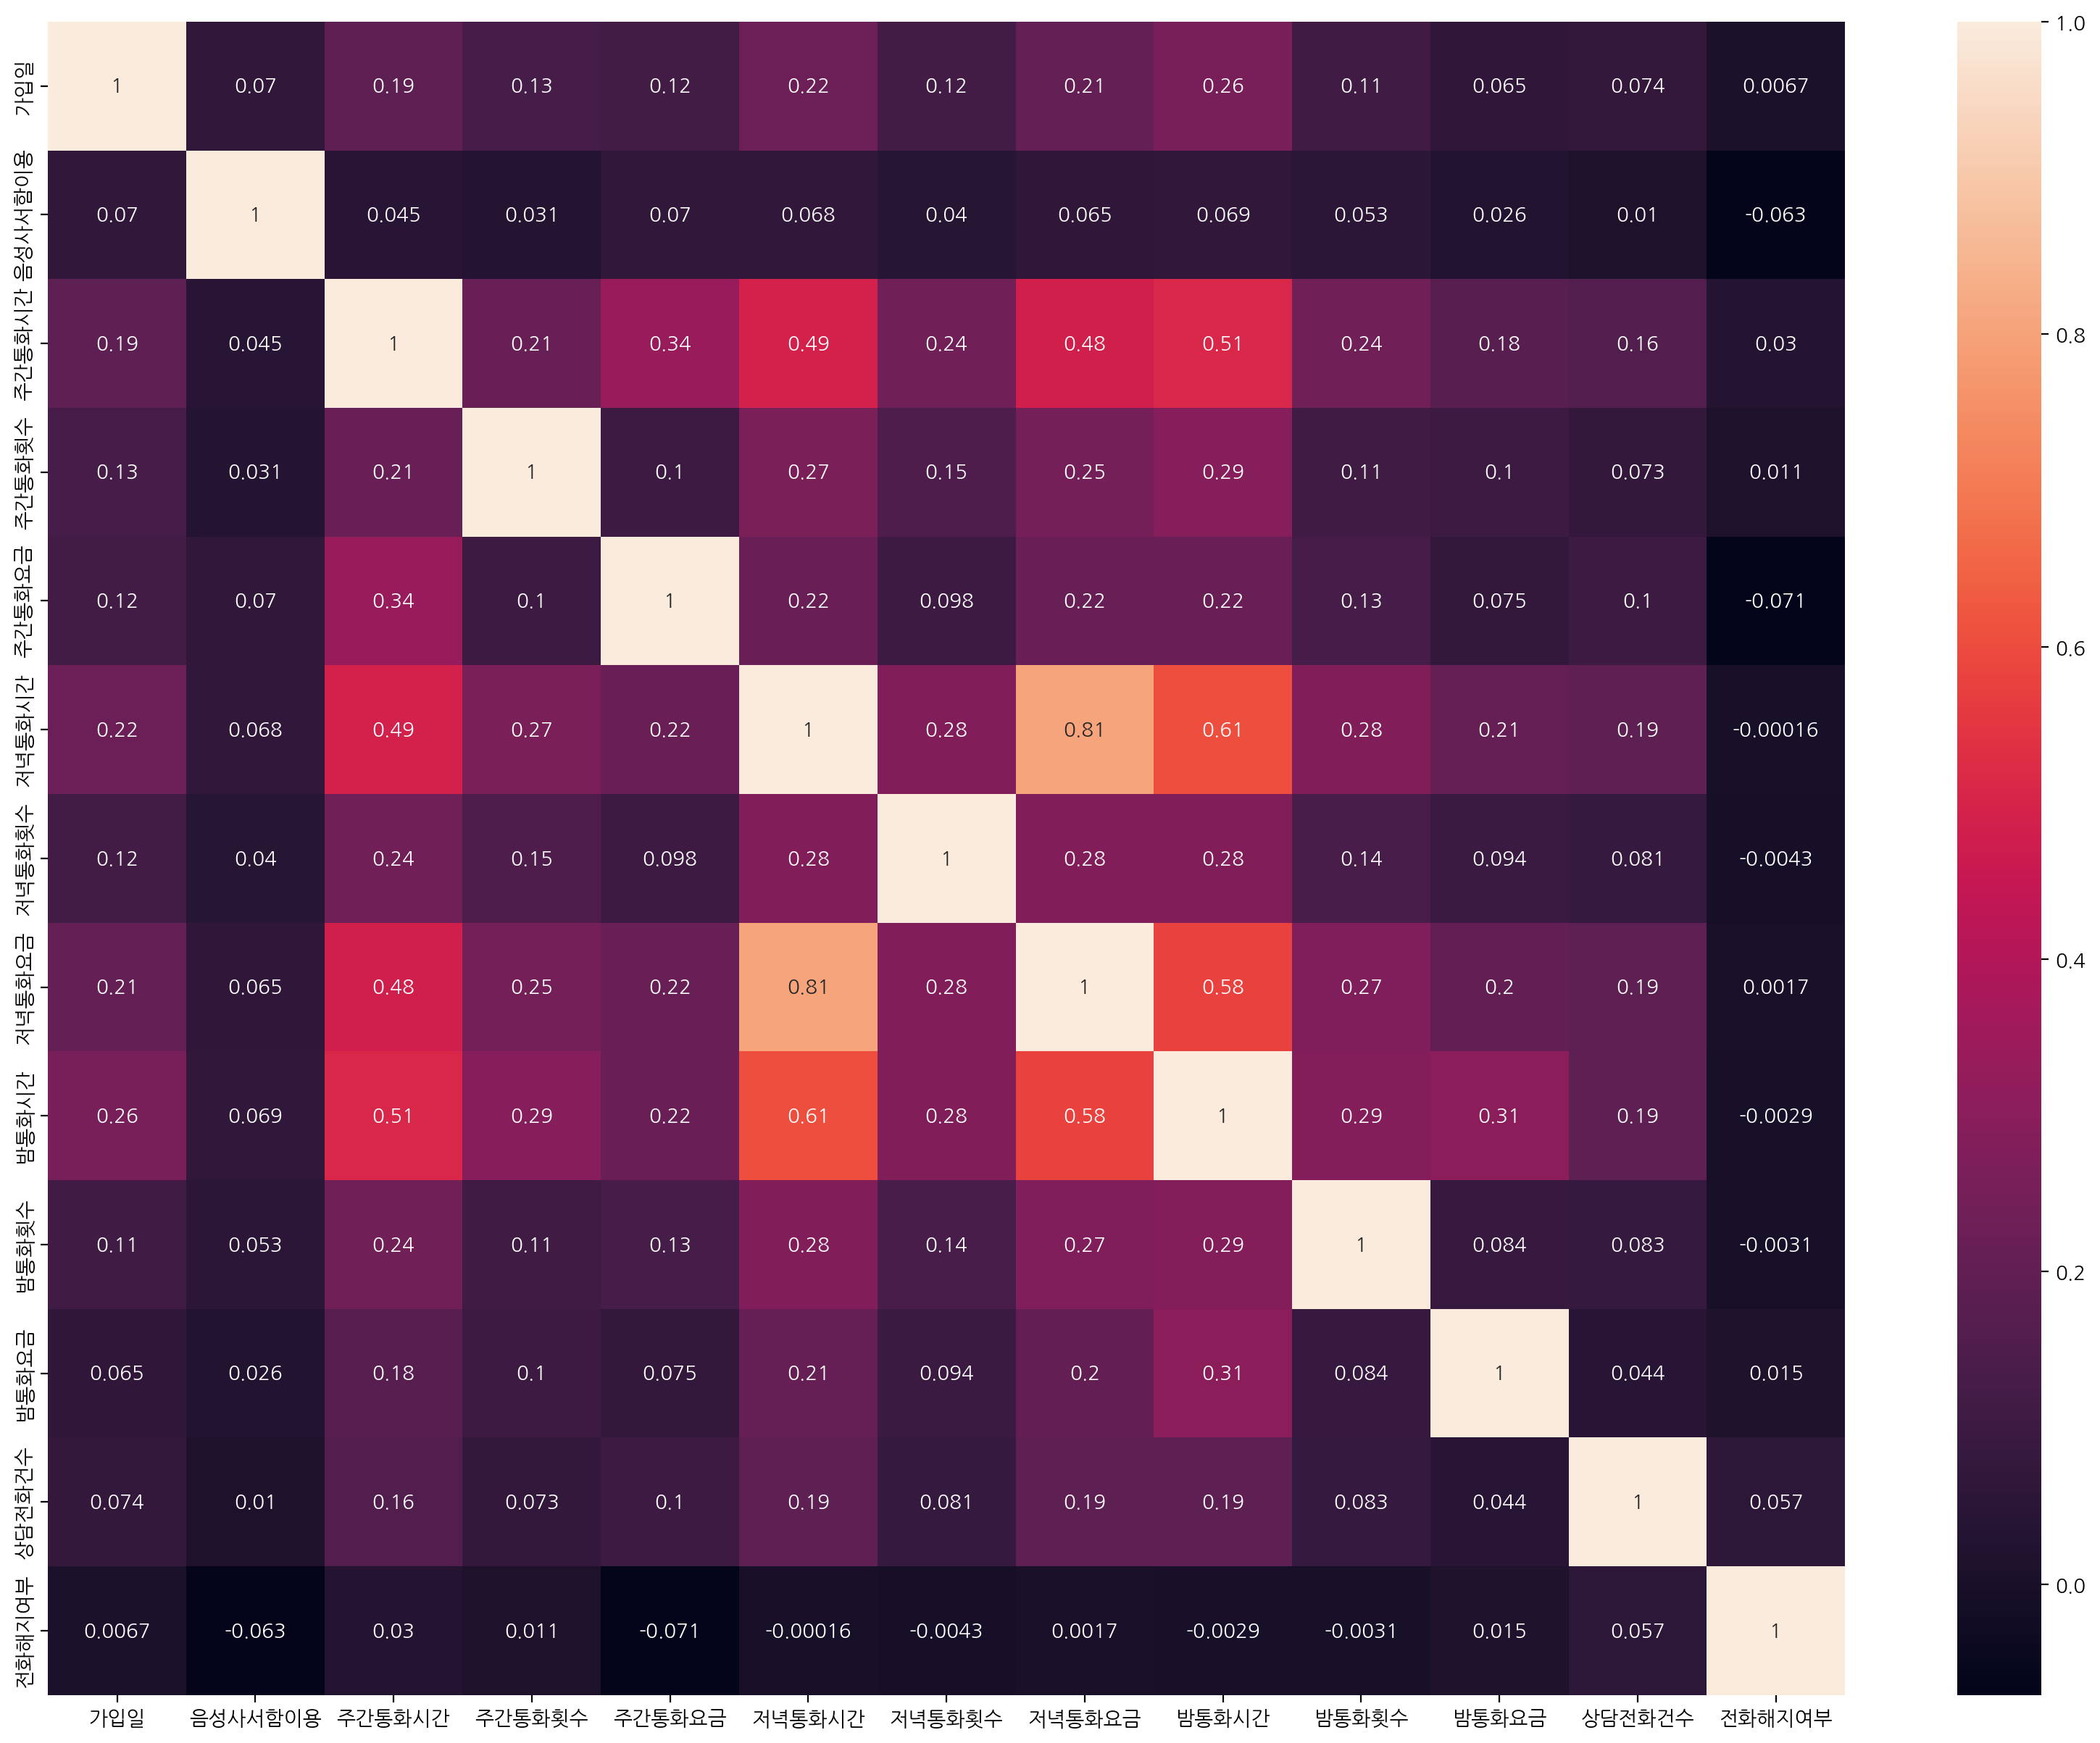

In [25]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True);

In [14]:
print(train.isnull().sum().sum(), test.isnull().sum().sum())

0 0


In [26]:
target_col = '전화해지여부'
# '전화해지여부'와의 상관계수가 높은순서대로
n = 12
corr_pairs = corr.nlargest(n+1, target_col)[target_col]
# '전화해지여부'와 자기 자신의 상관계수는 1이므로 제외
corr_pairs = corr_pairs[1:]
# 절대값이 큰 순서대로 정렬
corr_pairs = corr_pairs.abs().sort_values(ascending=False)
print(corr_pairs)

주간통화요금     0.071006
음성사서함이용    0.062734
상담전화건수     0.057114
주간통화시간     0.029975
밤통화요금      0.014513
주간통화횟수     0.010974
가입일        0.006688
저녁통화횟수     0.004276
밤통화횟수      0.003121
밤통화시간      0.002872
저녁통화요금     0.001711
저녁통화시간     0.000163
Name: 전화해지여부, dtype: float64


## 이상치 확인 및 제거

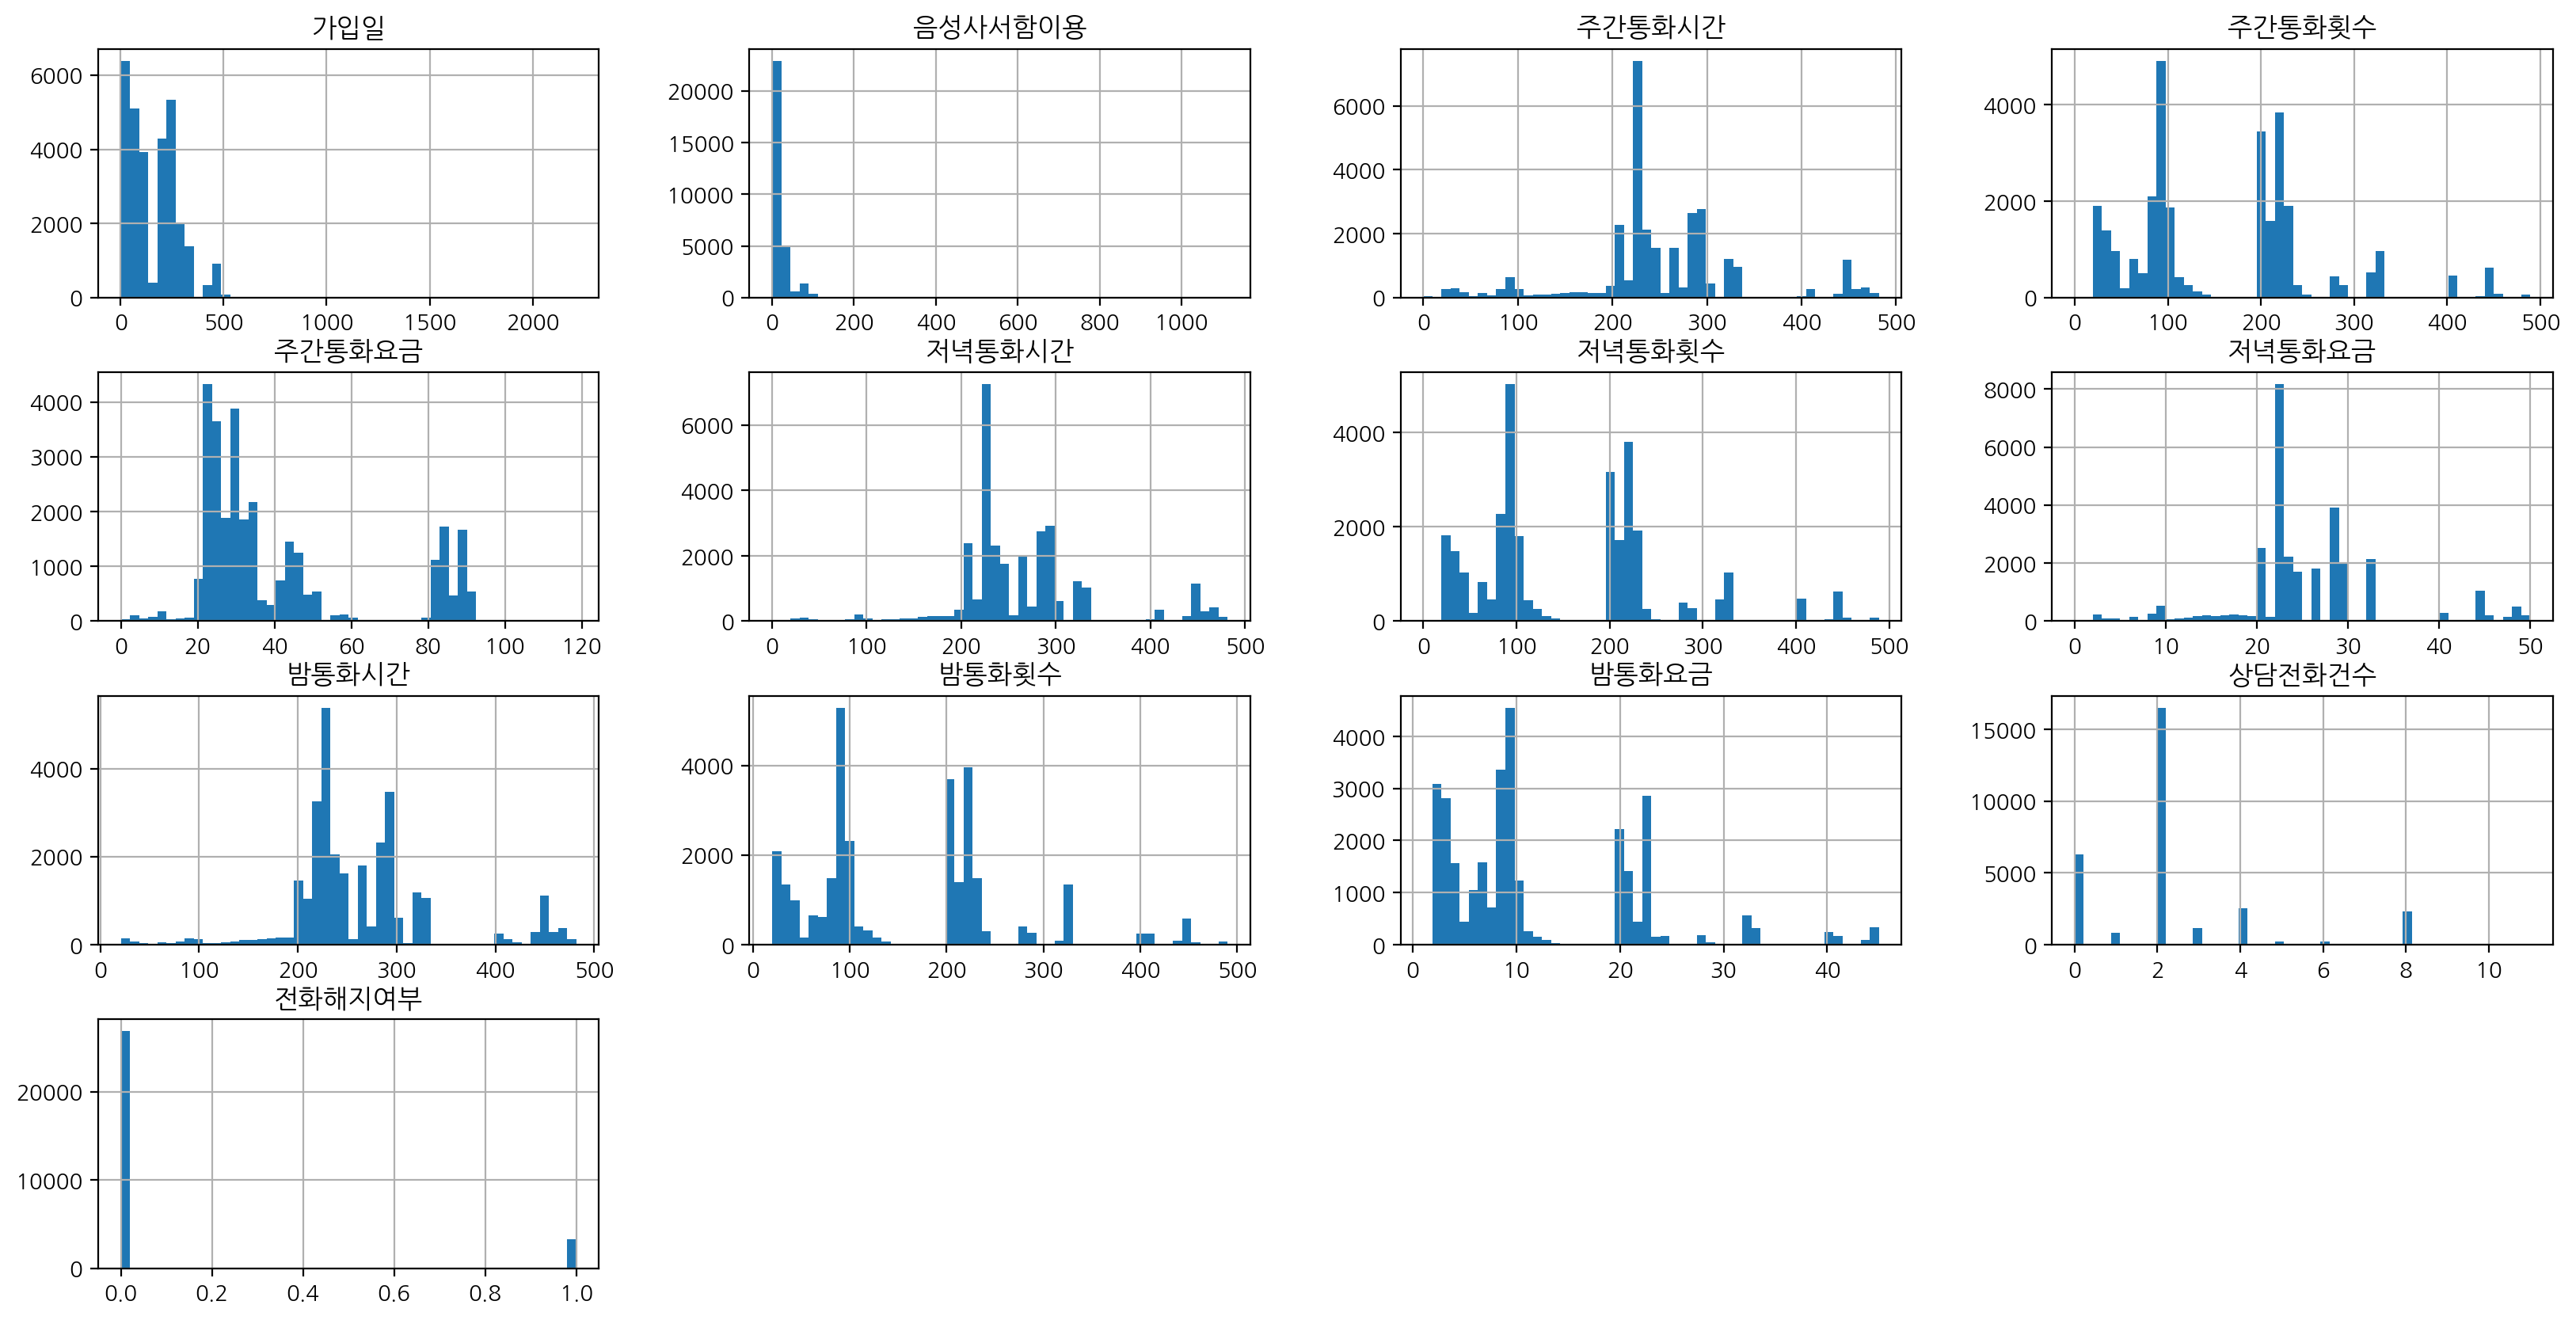

In [27]:
# test.hist(bins=50, figsize=(20, 10));
train.hist(bins=50, figsize=(20, 10));

In [28]:
train.columns

Index(['ID', '가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간',
       '저녁통화횟수', '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', '전화해지여부'],
      dtype='object')

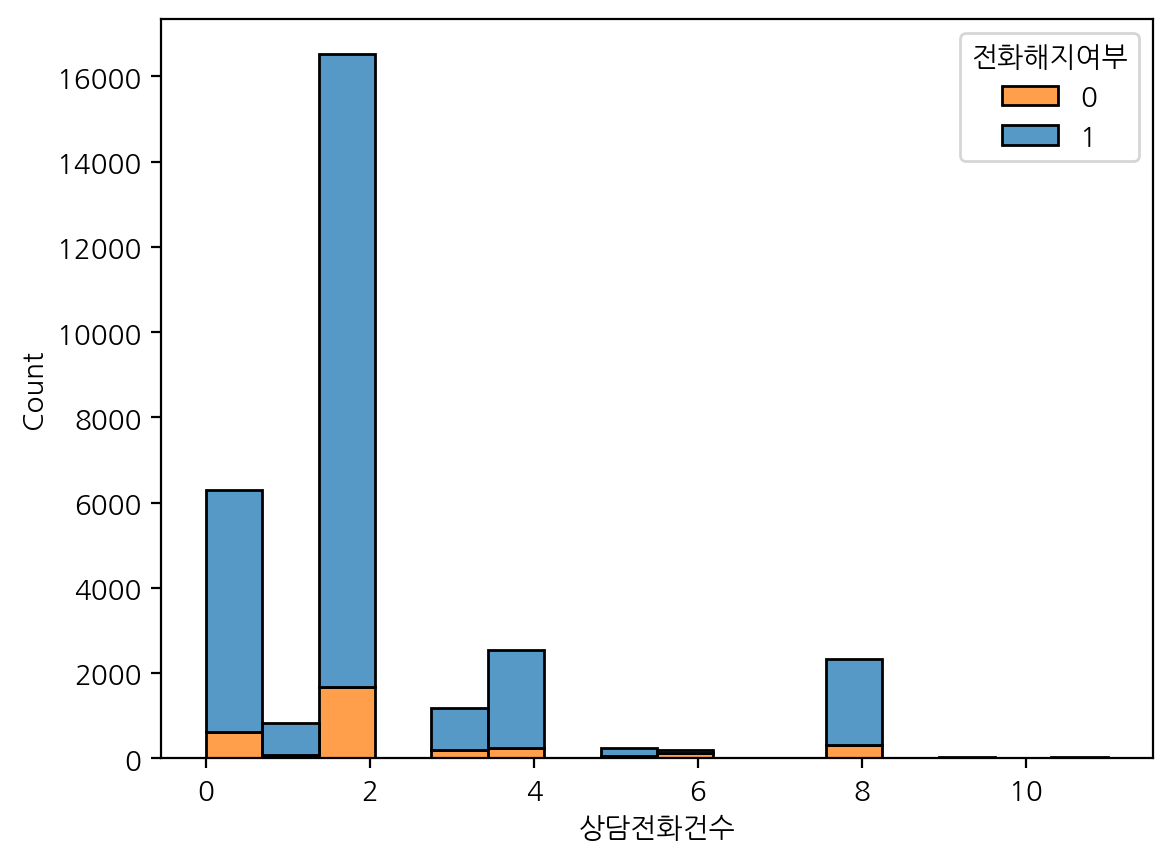

In [29]:
sns.histplot(data=train, x="상담전화건수", hue="전화해지여부", multiple="stack")
plt.legend(title="전화해지여부", labels=["0", "1"])
plt.show()

In [30]:
train[(train['가입일'] < 730) & (train['가입일'] >= 400)]

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
8,TRAIN_00008,441,0,100.0,65,48.4,448.6,86,48.88,444.4,95,9.84,4,0
61,TRAIN_00061,488,0,444.9,489,45.1,449.1,444,49.44,446.0,409,8.48,4,1
67,TRAIN_00067,446,0,90.9,450,46.2,470.9,401,44.50,457.4,75,6.48,4,0
116,TRAIN_00116,441,1,466.1,98,47.6,407.2,409,47.55,445.4,67,6.57,4,0
119,TRAIN_00119,489,0,444.5,449,45.8,450.4,68,44.48,444.8,84,9.84,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30116,TRAIN_30116,445,0,445.9,440,42.4,441.7,400,48.74,480.2,445,8.09,4,1
30117,TRAIN_30117,441,0,450.0,95,81.5,470.5,448,44.84,442.2,98,8.44,4,0
30121,TRAIN_30121,441,0,447.7,405,45.3,449.7,445,49.89,467.6,99,4.49,0,0
30137,TRAIN_30137,465,1,479.2,57,51.1,446.8,79,48.55,456.6,85,6.87,4,0


### 가입일 -> IQR이용, 음성사서함 -> 로그변환

In [4]:
a_q1 = train['가입일'].quantile(0.25)
a_q3 = train['가입일'].quantile(0.75)
a_iqr = a_q3 - a_q1
a_minimum = a_q1 - 1.5*a_iqr
a_maximum = a_q3 + 1.5*a_iqr

train.loc[train['가입일'] < a_minimum, '가입일'] = a_minimum
train.loc[train['가입일'] > a_maximum, '가입일'] = a_maximum

In [5]:
train['음성사서함이용'] = np.log(train['음성사서함이용'] + 1)

## 파생변수 만들기

In [6]:



# 약정기간은 연단위로 나뉘기때문에 11달~1년 미만 고객과 1년11달~2년 미만 고객을 1, 나머지는 0으로 바이너리 인코딩함
# rain['약정'] = np.where((train['가입일'] >= 335) & (train['가입일'] <= 395) | (train['가입일'] >= 700) & (train['가입일'] <= 760), 1, 0)

## 캣_GPT아이디어

train['총 통화 길이'] = train['주간통화시간'] + train['저녁통화시간'] + train['밤통화시간']
train['총 통화 요금'] = train['주간통화요금'] + train['저녁통화요금'] + train['밤통화요금']
train['총 통화 횟수'] = train['주간통화횟수'] + train['저녁통화횟수'] + train['밤통화횟수']
train['평균 통화 길이'] = train['총 통화 길이'] / train['총 통화 횟수']
train['평균 통화 요금'] = train['총 통화 요금'] / train['총 통화 길이']
train['주간 통화 이용'] = train['주간통화시간'] + train['주간통화횟수']
train['저녁 통화 이용'] = train['저녁통화시간'] + train['저녁통화횟수']
train['밤 통화 이용'] = train['밤통화시간'] + train['밤통화횟수']
train['총 통화 이용'] = train['주간 통화 이용'] + train['저녁 통화 이용'] + train['밤 통화 이용']
train['평균 상담 전화 횟수'] = train['상담전화건수'] / train['가입일']

train['주간'] = train['주간통화시간'] + train['주간통화요금'] + train['주간통화횟수']
train['저녁'] = train['저녁통화시간'] + train['주간통화요금'] + train['주간통화횟수']
train['밤'] = train['밤통화시간'] + train['밤통화요금'] + train['밤통화횟수']
train['가입월'] = train['가입일'] // 30
train['가입주'] = train['가입일'] // 7
train['가입일당 통화 길이'] = train['총 통화 길이'] / train['가입일']
train['가입일당 통화 횟수'] = train['총 통화 횟수'] / train['가입일']

In [7]:
## 평균 상담 전화 횟수도 이상치 처리가 필요함
train['평균 상담 전화 횟수'].describe()

count    30200.000000
mean         0.033113
std          0.095499
min          0.000000
25%          0.006920
50%          0.009852
75%          0.035242
max          5.000000
Name: 평균 상담 전화 횟수, dtype: float64

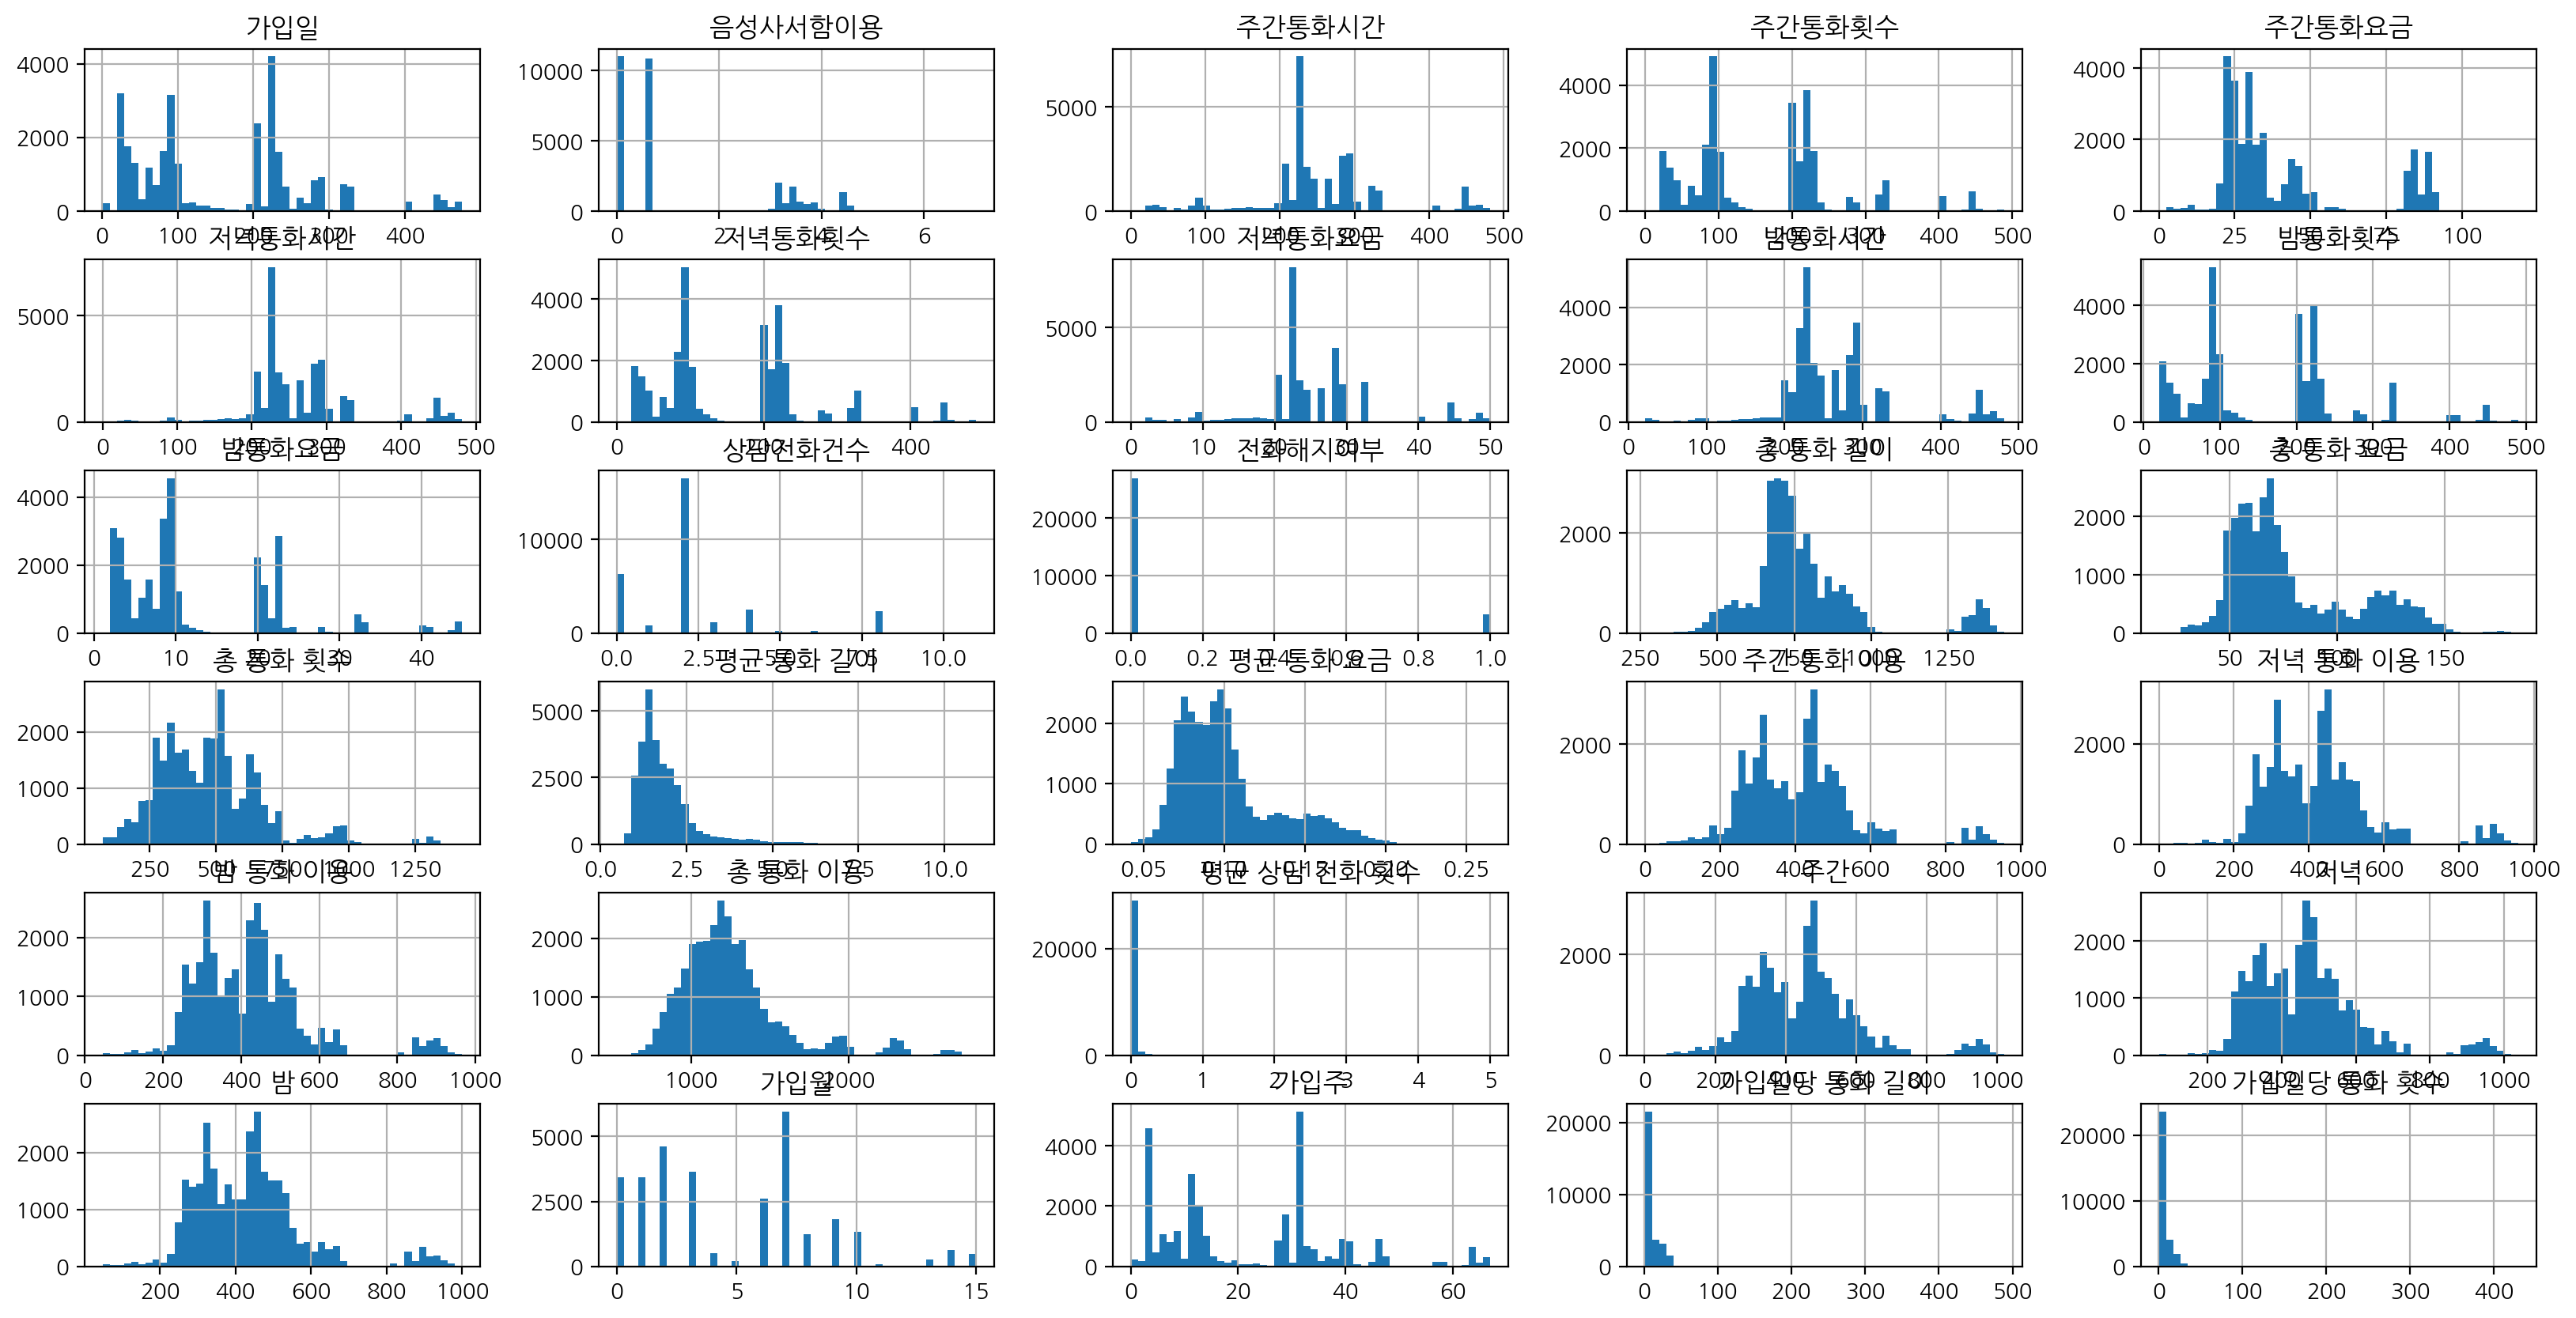

In [11]:
train.hist(bins=50, figsize=(20, 10));

## 나머지도 iqr로 이상치 대체

In [8]:
b_q1 = train['가입일당 통화 길이'].quantile(0.25)
b_q3 = train['가입일당 통화 길이'].quantile(0.75)
b_iqr = b_q3 - b_q1
b_minimum = b_q1 - 1.5*b_iqr
b_maximum = b_q3 + 1.5*b_iqr

train.loc[train['가입일당 통화 길이'] < b_minimum, '가입일당 통화 길이'] = b_minimum
train.loc[train['가입일당 통화 길이'] > b_maximum, '가입일당 통화 길이'] = b_maximum

In [9]:
c_q1 = train['평균 상담 전화 횟수'].quantile(0.25)
c_q3 = train['평균 상담 전화 횟수'].quantile(0.75)
c_iqr = c_q3 - c_q1
c_minimum = c_q1 - 1.5*c_iqr
c_maximum = c_q3 + 1.5*c_iqr

train.loc[train['평균 상담 전화 횟수'] < c_minimum, '평균 상담 전화 횟수'] = c_minimum
train.loc[train['평균 상담 전화 횟수'] > c_maximum, '평균 상담 전화 횟수'] = c_maximum

In [10]:
d_q1 = train['가입일당 통화 횟수'].quantile(0.25)
d_q3 = train['가입일당 통화 횟수'].quantile(0.75)
d_iqr = d_q3 - d_q1
d_minimum = d_q1 - 1.5*d_iqr
d_maximum = d_q3 + 1.5*d_iqr

train.loc[train['가입일당 통화 횟수'] < d_minimum, '가입일당 통화 횟수'] = d_minimum
train.loc[train['가입일당 통화 횟수'] > d_maximum, '가입일당 통화 횟수'] = d_maximum

## test도 똑같이 적용



In [11]:
a_q1 = test['가입일'].quantile(0.25)
a_q3 = test['가입일'].quantile(0.75)
a_iqr = a_q3 - a_q1
a_minimum = a_q1 - 1.5*a_iqr
a_maximum = a_q3 + 1.5*a_iqr

test.loc[test['가입일'] < a_minimum, '가입일'] = a_minimum
test.loc[test['가입일'] > a_maximum, '가입일'] = a_maximum

test['음성사서함이용'] = np.log(test['음성사서함이용'] + 1)


# 약정기간은 연단위로 나뉘기때문에 11달~1년 미만 고객과 1년11달~2년 미만 고객을 1, 나머지는 0으로 바이너리 인코딩함
# rain['약정'] = np.where((test['가입일'] >= 335) & (test['가입일'] <= 395) | (test['가입일'] >= 700) & (test['가입일'] <= 760), 1, 0)

## 캣_GPT아이디어

test['총 통화 길이'] = test['주간통화시간'] + test['저녁통화시간'] + test['밤통화시간']
test['총 통화 요금'] = test['주간통화요금'] + test['저녁통화요금'] + test['밤통화요금']
test['총 통화 횟수'] = test['주간통화횟수'] + test['저녁통화횟수'] + test['밤통화횟수']
test['평균 통화 길이'] = test['총 통화 길이'] / test['총 통화 횟수']
test['평균 통화 요금'] = test['총 통화 요금'] / test['총 통화 길이']
test['주간 통화 이용'] = test['주간통화시간'] + test['주간통화횟수']
test['저녁 통화 이용'] = test['저녁통화시간'] + test['저녁통화횟수']
test['밤 통화 이용'] = test['밤통화시간'] + test['밤통화횟수']
test['총 통화 이용'] = test['주간 통화 이용'] + test['저녁 통화 이용'] + test['밤 통화 이용']
test['평균 상담 전화 횟수'] = test['상담전화건수'] / test['가입일']


test['주간'] = test['주간통화시간'] + test['주간통화요금'] + test['주간통화횟수']
test['저녁'] = test['저녁통화시간'] + test['주간통화요금'] + test['주간통화횟수']
test['밤'] = test['밤통화시간'] + test['밤통화요금'] + test['밤통화횟수']
test['가입월'] = test['가입일'] // 30
test['가입주'] = test['가입일'] // 7
test['가입일당 통화 길이'] = test['총 통화 길이'] / test['가입일']
test['가입일당 통화 횟수'] = test['총 통화 횟수'] / test['가입일']




b_q1 = test['가입일당 통화 길이'].quantile(0.25)
b_q3 = test['가입일당 통화 길이'].quantile(0.75)
b_iqr = b_q3 - b_q1
b_minimum = b_q1 - 1.5*b_iqr
b_maximum = b_q3 + 1.5*b_iqr

test.loc[test['가입일당 통화 길이'] < b_minimum, '가입일당 통화 길이'] = b_minimum
test.loc[test['가입일당 통화 길이'] > b_maximum, '가입일당 통화 길이'] = b_maximum

c_q1 = test['평균 상담 전화 횟수'].quantile(0.25)
c_q3 = test['평균 상담 전화 횟수'].quantile(0.75)
c_iqr = c_q3 - c_q1
c_minimum = c_q1 - 1.5*c_iqr
c_maximum = c_q3 + 1.5*c_iqr

test.loc[test['평균 상담 전화 횟수'] < c_minimum, '평균 상담 전화 횟수'] = c_minimum
test.loc[test['평균 상담 전화 횟수'] > c_maximum, '평균 상담 전화 횟수'] = c_maximum

d_q1 = test['가입일당 통화 횟수'].quantile(0.25)
d_q3 = test['가입일당 통화 횟수'].quantile(0.75)
d_iqr = d_q3 - d_q1
d_minimum = d_q1 - 1.5*d_iqr
d_maximum = d_q3 + 1.5*d_iqr

test.loc[test['가입일당 통화 횟수'] < d_minimum, '가입일당 통화 횟수'] = d_minimum
test.loc[test['가입일당 통화 횟수'] > d_maximum, '가입일당 통화 횟수'] = d_maximum



In [12]:
train['가입월'].max()

15.0

In [13]:
train['계약종료대기'] = 0
train.loc[train['가입월'] == 11, '계약종료대기'] = 1
test['계약종료대기'] = 0
test.loc[test['가입월'] == 11, '계약종료대기'] = 1


In [18]:
train['가입월'].value_counts(1)

7.0     0.197318
2.0     0.152483
3.0     0.120762
1.0     0.113874
0.0     0.113841
6.0     0.086159
9.0     0.060066
10.0    0.043874
8.0     0.041159
14.0    0.020464
4.0     0.016258
15.0    0.016060
13.0    0.008907
5.0     0.006656
11.0    0.002119
Name: 가입월, dtype: float64

In [19]:
train['계약종료대기'].value_counts(1)

0    0.997881
1    0.002119
Name: 계약종료대기, dtype: float64

In [ ]:
train.hist(bins=50, figsize=(20, 10));

## 상관계수 확인2

C:\Users\신하진\AppData\Local\Temp\ipykernel_17384\1775667365.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


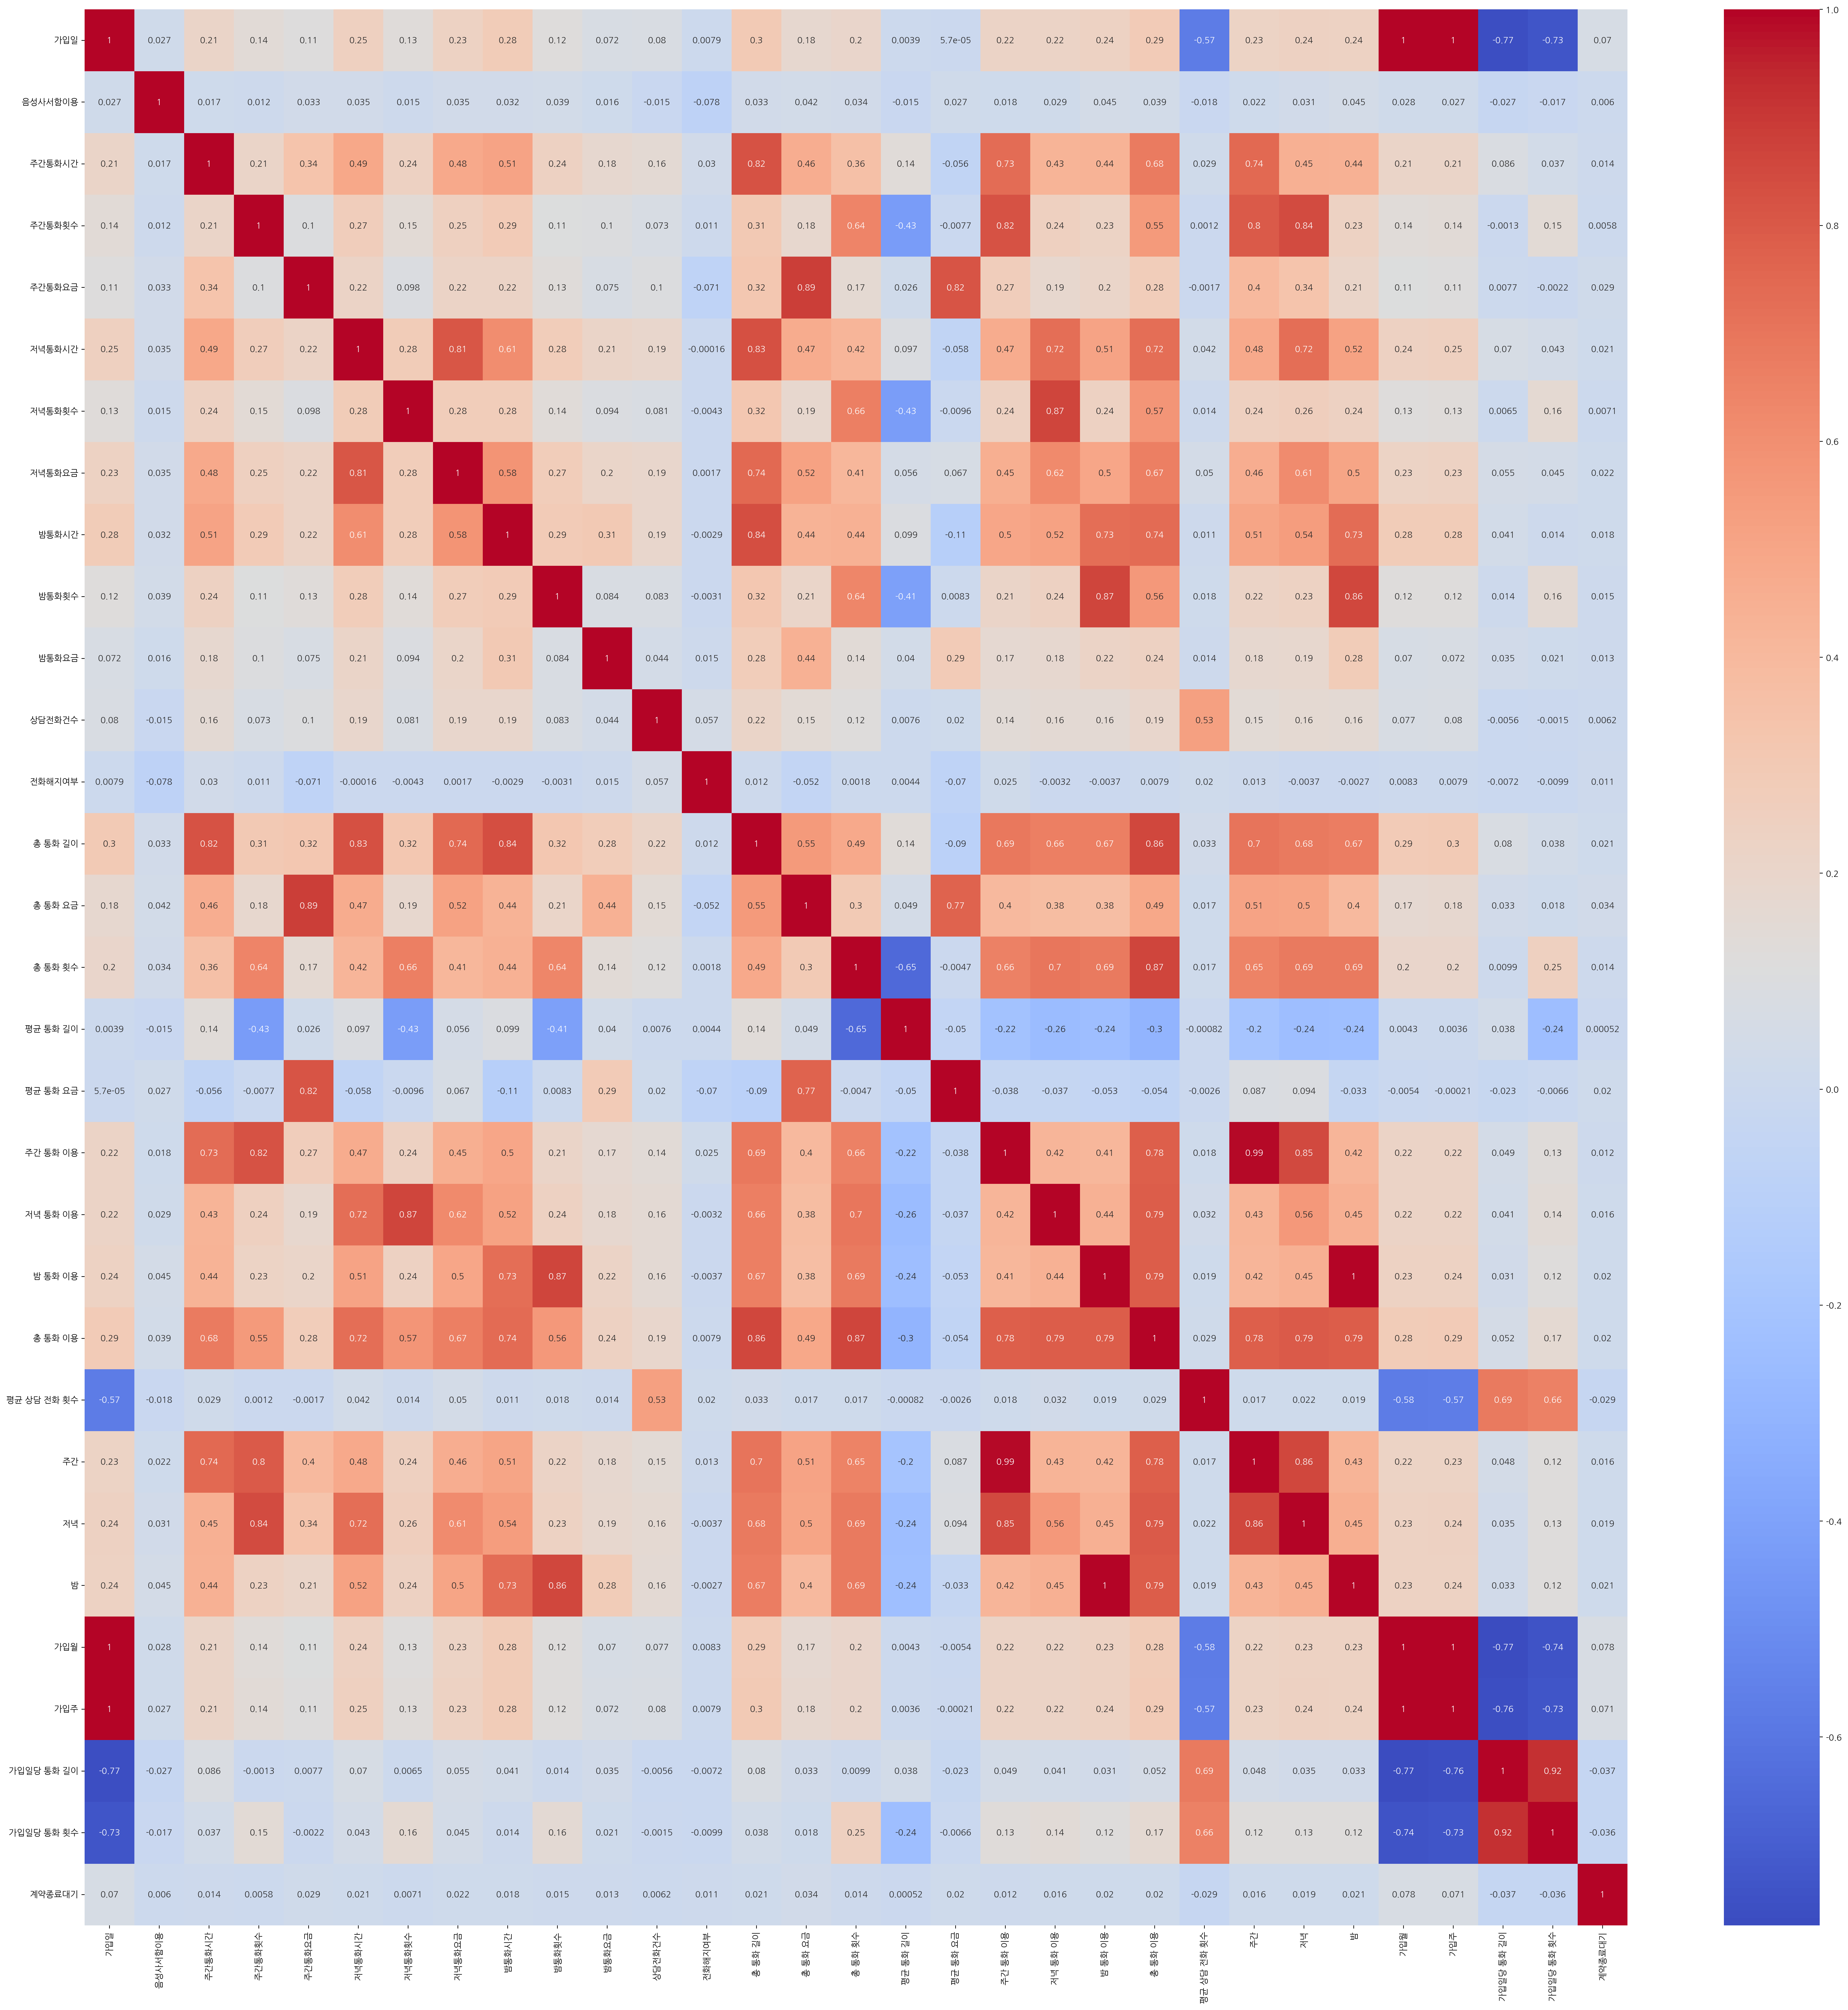

In [45]:
corr = train.corr()
 # 상관계수를 시각화한다.
plt.subplots(figsize=(40, 40))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [422]:
target_col = '전화해지여부'
# '전화해지여부'와의 상관계수가 높은순서대로
n = 50
corr_pairs = corr.nlargest(n+1, target_col)[target_col]
# '전화해지여부'와 자기 자신의 상관계수는 1이므로 제외
corr_pairs = corr_pairs[1:]
# 절대값이 큰 순서대로 정렬
corr_pairs = corr_pairs.abs().sort_values(ascending=False)
print(corr_pairs)

음성사서함이용        0.077510
주간통화요금         0.071006
평균 통화 요금       0.070012
상담전화건수         0.057114
총 통화 요금        0.051642
주간통화시간         0.029975
주간 통화 이용       0.025087
평균 상담 전화 횟수    0.020011
밤통화요금          0.014513
주간             0.013057
총 통화 길이        0.011960
계약종료대기         0.011440
주간통화횟수         0.010974
가입일당 통화 횟수     0.009890
가입월            0.008255
가입일            0.007944
가입주            0.007937
총 통화 이용        0.007912
가입일당 통화 길이     0.007227
평균 통화 길이       0.004370
저녁통화횟수         0.004276
밤 통화 이용        0.003734
저녁             0.003699
저녁 통화 이용       0.003162
밤통화횟수          0.003121
밤통화시간          0.002872
밤              0.002725
총 통화 횟수        0.001818
저녁통화요금         0.001711
저녁통화시간         0.000163
Name: 전화해지여부, dtype: float64


## 다중공선성 확인( 분류모델은 필요없다함 )

In [48]:
from statsmodels.formula.api import ols

In [49]:
train.columns

Index(['ID', '가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간',
       '저녁통화횟수', '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', '전화해지여부',
       '총 통화 길이', '총 통화 요금', '총 통화 횟수', '평균 통화 길이', '평균 통화 요금', '주간 통화 이용',
       '저녁 통화 이용', '밤 통화 이용', '총 통화 이용', '평균 상담 전화 횟수', '주간', '저녁', '밤', '가입월',
       '가입주', '가입일당 통화 길이', '가입일당 통화 횟수', '계약종료대기'],
      dtype='object')

In [52]:
model = ols('전화해지여부 ~ 주간통화시간 + 주간통화횟수 + 주간통화요금', train)
res = model.fit()            
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 전화해지여부   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     84.97
Date:                Sun, 26 Mar 2023   Prob (F-statistic):           9.58e-55
Time:                        16:43:05   Log-Likelihood:                -7619.5
No. Observations:               30200   AIC:                         1.525e+04
Df Residuals:                   30196   BIC:                         1.528e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1020      0.006     16.897      0.000       0.090       0.114
주간통화시간         0.0002    2.3e-05      9.557      0.000       0.000       0.000
주간통화횟수      2.307e-05   1.81e-05      1.277      0.202   -1.23e-05    5.85e-05
주간통화요금        -0.0012   8.22e-05    -15.063      0.000      -0.001      -0.001
==============================================================================
Omnibus:                    14013.495   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52126.596
Skew:                           2.462   Prob(JB):                         0.00
Kurtosis:                       7.144   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
model.exog_names


['Intercept', '주간통화시간', '주간통화횟수', '주간통화요금']

In [54]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)}
             for i, column in enumerate(model.exog_names)
             if column != 'intercept') # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,Intercept,11.351190
1,주간통화시간,1.171259
2,주간통화횟수,1.048893
3,주간통화요금,1.129054


# 예측 학습 데이터셋 나누기

In [14]:
X = train.drop(['전화해지여부', 'ID'], axis=1)
y = train['전화해지여부']
X.shape, y.shape

((30200, 30), (30200,))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((27180, 30), (3020, 30), (27180,), (3020,))

In [16]:
y_train.value_counts(1)

0    0.89014
1    0.10986
Name: 전화해지여부, dtype: float64

In [17]:
X_train.head(2)

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,...,총 통화 이용,평균 상담 전화 횟수,주간,저녁,밤,가입월,가입주,가입일당 통화 길이,가입일당 통화 횟수,계약종료대기
20303,202.0,3.258097,232.9,202,23.9,243.5,40,24.44,231.0,201,...,1150.4,0.009901,458.8,469.4,436.42,6.0,28.0,3.501980,2.193069,0
25438,44.0,0.000000,225.5,23,25.3,245.7,92,22.24,233.8,244,...,1064.0,0.045455,273.8,294.0,480.09,1.0,6.0,16.022727,8.159091,0


In [18]:
X_test = test.drop('ID', axis=1)
print(X_test.shape)
X_test.head(2)

(12943, 30)


,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,...,총 통화 이용,평균 상담 전화 횟수,주간,저녁,밤,가입월,가입주,가입일당 통화 길이,가입일당 통화 횟수,계약종료대기
0,110.0,0.000000,210.7,142,35.6,205.9,93,17.43,120.9,111,...,883.5,0.018182,388.3,383.5,237.27,3.0,15.0,4.886364,3.145455,0
1,283.0,0.693147,268.5,100,30.3,283.0,92,28.32,290.0,89,...,1122.5,0.000000,398.8,413.3,387.82,9.0,40.0,2.973498,0.992933,0


# PCA

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 데이터의 feature들을 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_valid_scaled = scaler.transform(X_valid)


# PCA 모델 생성 및 학습
pca = PCA(n_components=10) # 주성분 10개를 추출
pca.fit(X_train_scaled)

# 변환된 train, test, valid 데이터 생성
X_valid_pca = pca.transform(X_valid_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 새로운 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train_pca, y_train)

LogisticRegression()

In [20]:
model.predict_proba(X_test_pca)

array([[0.88102366, 0.11897634],
       [0.87957511, 0.12042489],
       [0.87782935, 0.12217065],
       ...,
       [0.93258738, 0.06741262],
       [0.9302226 , 0.0697774 ],
       [0.90582711, 0.09417289]])

In [21]:
pca = PCA(n_components=10) # 주성분 10개를 추출
pca.fit(X_train_scaled)

# 주요 feature들 추출
features = pca.components_
print(features)

[[ 1.25618941e-01  1.57638593e-02  2.15892026e-01  1.74861223e-01
   1.22374928e-01  2.37494056e-01  1.46931195e-01  2.25833411e-01
   2.37470596e-01  1.60994289e-01  9.32707619e-02  6.93429460e-02
   2.76508601e-01  1.91955952e-01  2.48289557e-01 -7.09256881e-02
   2.23101414e-02  2.47996024e-01  2.30027972e-01  2.39110006e-01
   3.04595017e-01 -9.68544620e-03  2.53882006e-01  2.60257061e-01
   2.41317569e-01  1.23820089e-01  1.25682285e-01 -1.24538618e-02
   1.55484312e-02  1.04397678e-02]
 [-4.01077392e-01 -8.47245924e-03  2.14175758e-02  4.99017918e-02
   4.94957599e-03  1.91460214e-02  4.59569090e-02  1.86757963e-02
   3.16025580e-03  4.88339568e-02  1.48386440e-02  4.55341994e-02
   1.79356247e-02  1.40567437e-02  7.44194313e-02 -7.22099883e-02
   2.42259959e-03  4.73591023e-02  4.31236943e-02  3.66690111e-02
   5.40391273e-02  3.45915226e-01  4.56991727e-02  4.49876032e-02
   3.70424567e-02 -4.03259635e-01 -4.00724471e-01  4.20111205e-01
   4.27847139e-01 -3.23137236e-02]
 [-3.0

## 주요 피쳐 확인하기

In [252]:
train.columns

Index(['ID', '가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간',
       '저녁통화횟수', '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', '전화해지여부',
       '총 통화 길이', '총 통화 요금', '총 통화 횟수', '평균 통화 길이', '평균 통화 요금', '주간 통화 이용',
       '저녁 통화 이용', '밤 통화 이용', '총 통화 이용', '평균 상담 전화 횟수', '주간', '저녁', '밤', '가입월',
       '가입주', '가입일당 통화 길이', '가입일당 통화 횟수', '계약종료대기'],
      dtype='object')

In [255]:
feature_names = ['ID', '가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간',
       '저녁통화횟수', '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', '전화해지여부',
       '총 통화 길이', '총 통화 요금', '총 통화 횟수', '평균 통화 길이', '평균 통화 요금', '주간 통화 이용',
       '저녁 통화 이용', '밤 통화 이용', '총 통화 이용', '평균 상담 전화 횟수', '주간', '저녁', '밤', '가입월',
       '가입주', '가입일당 통화 길이', '가입일당 통화 횟수', '계약종료대기']

In [286]:
# feature 이름과 함께 출력
for i, feature in enumerate(features):
    print(f"주요 feature {i+1}:")
    feature_abs = [(j, abs(weight)) for j, weight in enumerate(feature)]
    feature_abs_sorted = sorted(feature_abs, key=lambda x: x[1], reverse=True)
    for j, abs_weight in feature_abs_sorted:
        print(f"{feature_names[j]}: {abs_weight:.3f}")
    print()

주요 feature 1:
저녁 통화 이용: 0.305
상담전화건수: 0.277
평균 상담 전화 횟수: 0.260
총 통화 이용: 0.254
총 통화 길이: 0.248
평균 통화 길이: 0.248
주간: 0.241
주간 통화 이용: 0.239
주간통화요금: 0.237
저녁통화요금: 0.237
평균 통화 요금: 0.230
저녁통화횟수: 0.226
음성사서함이용: 0.216
전화해지여부: 0.192
주간통화시간: 0.175
밤통화시간: 0.161
저녁통화시간: 0.147
밤: 0.126
ID: 0.126
저녁: 0.124
주간통화횟수: 0.122
밤통화횟수: 0.093
총 통화 요금: 0.071
밤통화요금: 0.069
총 통화 횟수: 0.022
가입일: 0.016
가입주: 0.016
가입월: 0.012
가입일당 통화 길이: 0.010
밤 통화 이용: 0.010

주요 feature 2:
가입주: 0.428
가입월: 0.420
저녁: 0.403
ID: 0.401
밤: 0.401
밤 통화 이용: 0.346
총 통화 길이: 0.074
총 통화 요금: 0.072
저녁 통화 이용: 0.054
주간통화시간: 0.050
밤통화시간: 0.049
평균 통화 길이: 0.047
저녁통화시간: 0.046
총 통화 이용: 0.046
밤통화요금: 0.046
평균 상담 전화 횟수: 0.045
평균 통화 요금: 0.043
주간: 0.037
주간 통화 이용: 0.037
가입일당 통화 길이: 0.032
음성사서함이용: 0.021
주간통화요금: 0.019
저녁통화횟수: 0.019
상담전화건수: 0.018
밤통화횟수: 0.015
전화해지여부: 0.014
가입일: 0.008
주간통화횟수: 0.005
저녁통화요금: 0.003
총 통화 횟수: 0.002

주요 feature 3:
총 통화 횟수: 0.449
주간통화횟수: 0.441
전화해지여부: 0.440
총 통화 요금: 0.335
총 통화 길이: 0.258
밤통화시간: 0.207
밤통화횟수: 0.177
저녁통화시간: 0.176
주간 통화 이용: 0.132

# 랜덤서치cv로 하이퍼파라미터 구하기

In [29]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint as sp_randint
# from xgboost import XGBClassifier
# import lightgbm as lgbm

# # define the parameter space
# param_dist_xgb = {
#     'n_estimators': sp_randint(50, 200),
#     'max_depth': sp_randint(3, 10),
#     'learning_rate': [0.01, 0.1, 0.5, 1],
#     'subsample': [0.5, 0.7, 0.9, 1],
#     'gamma': [0, 1, 5],
#     'colsample_bytree': [0.5, 0.7, 0.9, 1]
# }

# # param_dist_lgb = {
# #     'n_estimators': sp_randint(50, 200),
# #     'max_depth': sp_randint(3, 10),
# #     'learning_rate': [0.01, 0.1, 0.5, 1],
# #     'subsample': [0.5, 0.7, 0.9, 1],
# #     'num_leaves': [2**i for i in range(3, 11)],
# #     'colsample_bytree': [0.5, 0.7, 0.9, 1]
# # }

# # define the models
# xgb = XGBClassifier()
# # lgb = lgbm.LGBMClassifier()

# # define the search
# search_xgb = RandomizedSearchCV(
#     xgb,
#     param_distributions=param_dist_xgb,
#     n_iter=50,
#     scoring='f1',
#     n_jobs=-1,
#     cv=5,
#     verbose=1
# )

# # search_lgb = RandomizedSearchCV(
# #     lgb,
# #     param_distributions=param_dist_lgb,
# #     n_iter=50,
# #     scoring='f1',
# #     n_jobs=-1,
# #     cv=5,
# #     verbose=1
# # )

# # perform the search
# search_xgb.fit(X_train_pca, y_train)
# # search_lgb.fit(X_train_pca, y_train)

# # print the best parameters and score
# print("Best parameters found for XGBoost: ", search_xgb.best_params_)
# print("F1 score on the test data for XGBoost: {:.4f}".format(search_xgb.best_score_))

# # print("Best parameters found for LightGBM: ", search_lgb.best_params_)
# # print("F1 score on the test data for LightGBM: {:.4f}".format(search_lgb.best_score_))


OSError: [Errno 22] Invalid argument

In [437]:
best_params_xgb = search_xgb.best_params_
xgb = XGBClassifier(**best_params_xgb)
xgb.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=128, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

# 머신러닝 모델 선정
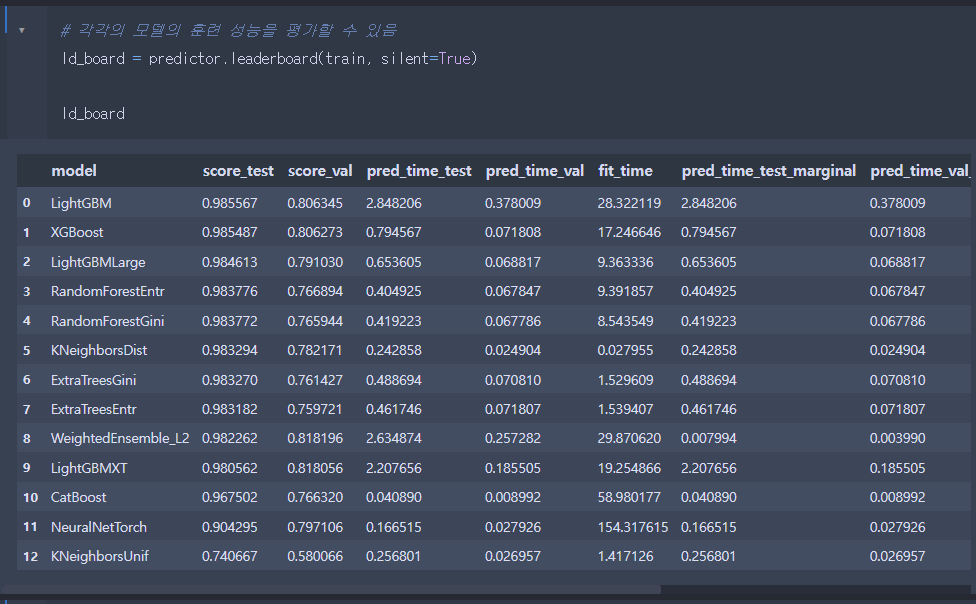

## XGBoost

In [ ]:
# Best parameters found for XGBoost:  {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 1, 'max_depth': 8, 'n_estimators': 128, 'subsample': 0.9}
# F1 score on the test data for XGBoost: 0.3945

In [32]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1)
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [23]:
# n_estimators
n_estimators = np.random.randint(low=100, high=300, size=10)

In [24]:
# learning_rate
learning_rate = np.random.uniform(low=0.05, high=0.3, size=10000)

In [25]:
# max_depth
max_depth = np.random.randint(3, 20, 5)

In [51]:
# subsample
subsample = np.random.uniform(low=0.5, high=1.0, size=5)

In [52]:
# colsample_bytree
colsample_bytree = np.random.uniform(low=0.5, high=1.0, size=5)

In [53]:
# min_child_weight
min_child_weight = np.random.randint(1, 10, 5)

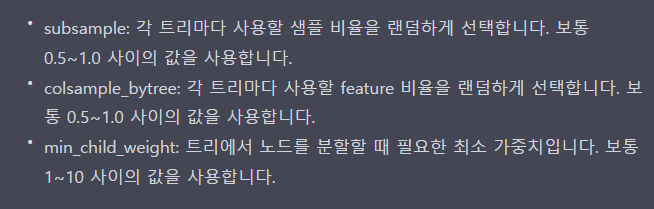

In [54]:
params = {'n_estimators': n_estimators,
          'learning_rate': learning_rate,
          'max_depth': max_depth,
          'subsample': subsample,
          'colsample_bytree': colsample_bytree,
          'min_child_weight': min_child_weight}
params

{'n_estimators': array([274, 114, 229, 118, 169, 210, 250, 127, 179, 259]),
 'learning_rate': array([0.12427872, 0.11028872, 0.168033  , ..., 0.19749505, 0.14271916,
        0.22020639]),
 'max_depth': array([13, 18, 11,  9,  5]),
 'subsample': array([0.59019062, 0.82250708, 0.60740429, 0.94836982, 0.87879091]),
 'colsample_bytree': array([0.66885599, 0.89796748, 0.59936784, 0.60848877, 0.55443173]),
 'min_child_weight': array([3, 6, 3, 5, 9])}

In [55]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(model_xgb, params, n_iter=10, scoring = 'f1_macro', n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                   param_distributions={'colsample_bytree': array([0.66885599, 0.89796748, 0.59936784, 0.60848877, 0.55443173]),
                                        'learning_rate': array([0.12427872, 0.11028872, 0.168033  , ..., 0.19749505, 0.14271916,
       0.22020639]),
                                        'max_depth': array([13, 18, 11,  9,  5]),
                                        'min_child_weight': array([3, 6, 3, 5, 9]),
                                        'n_estimators': array([274, 114, 229, 118, 169, 210, 250, 127, 179, 259]),
                                        'subsample': array([0.59019062, 0.82250708, 0.60740429, 0.94836982, 0.87879091])},
                   scoring='f1_macro', verbose=1)

In [56]:
best_model_xgb = clf.best_estimator_
best_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5993678400884541, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2662226322403757,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=274, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [57]:
clf.best_score_

0.6960657965796825

In [58]:
best_params = clf.best_params_
list(zip(best_params.keys(), best_params.values()))

[('subsample', 0.9483698194013953),
 ('n_estimators', 274),
 ('min_child_weight', 3),
 ('max_depth', 18),
 ('learning_rate', 0.2662226322403757),
 ('colsample_bytree', 0.5993678400884541)]

In [59]:
pd.DataFrame(clf.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,19.531588,0.499223,0.163762,0.037110,0.94837,274,3,18,0.266223,0.599368,"{'subsample': 0.9483698194013953, 'n_estimator...",0.690497,0.704142,0.695958,0.689251,0.700480,0.696066,0.005695,1
8,12.898519,0.386035,0.081382,0.007208,0.94837,179,3,13,0.222799,0.668856,"{'subsample': 0.9483698194013953, 'n_estimator...",0.658380,0.679962,0.676580,0.670161,0.683576,0.673732,0.008857,2
9,11.364427,0.703931,0.042480,0.002053,0.878791,210,9,9,0.282296,0.897967,"{'subsample': 0.8787909064754089, 'n_estimator...",0.640091,0.635573,0.664294,0.652416,0.645716,0.647618,0.010064,3
5,8.825807,0.229801,0.048270,0.003816,0.590191,169,5,11,0.175839,0.897967,"{'subsample': 0.5901906165742958, 'n_estimator...",0.621008,0.649965,0.645206,0.647828,0.640390,0.640880,0.010437,4
0,4.976895,0.134229,0.029920,0.002443,0.878791,127,3,9,0.270031,0.599368,"{'subsample': 0.8787909064754089, 'n_estimator...",0.613727,0.621470,0.615101,0.626208,0.629468,0.621195,0.006108,5
3,15.466255,0.347159,0.069614,0.005829,0.94837,274,6,11,0.104893,0.608489,"{'subsample': 0.9483698194013953, 'n_estimator...",0.610675,0.603142,0.604851,0.616650,0.619451,0.610954,0.006372,6
1,7.695428,0.120378,0.066024,0.003116,0.822507,127,9,18,0.111334,0.599368,"{'subsample': 0.8225070826249136, 'n_estimator...",0.570947,0.571698,0.570870,0.589909,0.580482,0.576781,0.007495,7
4,4.154693,0.222516,0.028723,0.005621,0.590191,118,9,9,0.084197,0.608489,"{'subsample': 0.5901906165742958, 'n_estimator...",0.514499,0.498648,0.504942,0.519034,0.520448,0.511514,0.008414,8
2,4.974901,0.252916,0.023138,0.001163,0.878791,229,9,5,0.123221,0.554432,"{'subsample': 0.8787909064754089, 'n_estimator...",0.506420,0.501757,0.502638,0.512702,0.506742,0.506052,0.003871,9
7,3.100312,0.169911,0.016157,0.003420,0.822507,114,9,5,0.095593,0.608489,"{'subsample': 0.8225070826249136, 'n_estimator...",0.491036,0.482648,0.482789,0.495782,0.487725,0.487996,0.005013,10


In [60]:
y_valid_pred_xgb = best_model_xgb.fit(X_train_pca, y_train).predict(X_valid_pca)
y_valid_pred_xgb[:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_valid, y_valid_pred_xgb, average='macro')

In [ ]:
# valid score
score_xgb = best_model_xgb.score(X_valid_pca, y_valid)
score_xgb

In [ ]:
# test에 predict
y_pred_xgb = best_model_xgb.predict(X_test_pca)
y_pred_xgb[:5]

In [ ]:
# XGBoost 피쳐 중요도
xgb.plot_importance(best_model_xgb, max_num_features=20)

In [ ]:
# 트리 시각화
# num_trees : 순차적으로 생성되는 트리 중 몇 번째 트리를 보여줄 것인지
xgb.plot_tree(best_model_xgb, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(100, 100)

In [320]:
# es = callback.EarlyStopping(
#     rounds=5,  # 예를 들어 rounds 값을 적절하게 수정합니다.
#     save_best=True,
#     maximize=False,
#     data_name="validation_0",
#     metric_name="logloss",
# )

# model_xgb = xgb.XGBClassifier(callbacks=[es], **model_xgb.get_xgb_params())

# # fit the classifier with early stopping on the validation set
# eval_metrics = ["logloss", "auc"]
# model_xgb.fit(X_train_pca, y_train, eval_set=[(X_valid_pca, y_valid)], eval_metric=eval_metrics, verbose=False)

C:\Users\신하진\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None,
              callbacks=[<xgboost.callback.EarlyStopping object at 0x000002AA044E0DC0>],
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [321]:
# y_valid_predict_xgb= model_xgb.predict(X_valid_pca)
# y_valid_predict_xgb[:5]

array([0, 0, 1, 0, 0])

In [322]:
# top_10_features = list(fi.nlargest(10).index)
# print(top_10_features)

[0, 1, 6, 2, 8, 4, 7, 5, 9, 3]


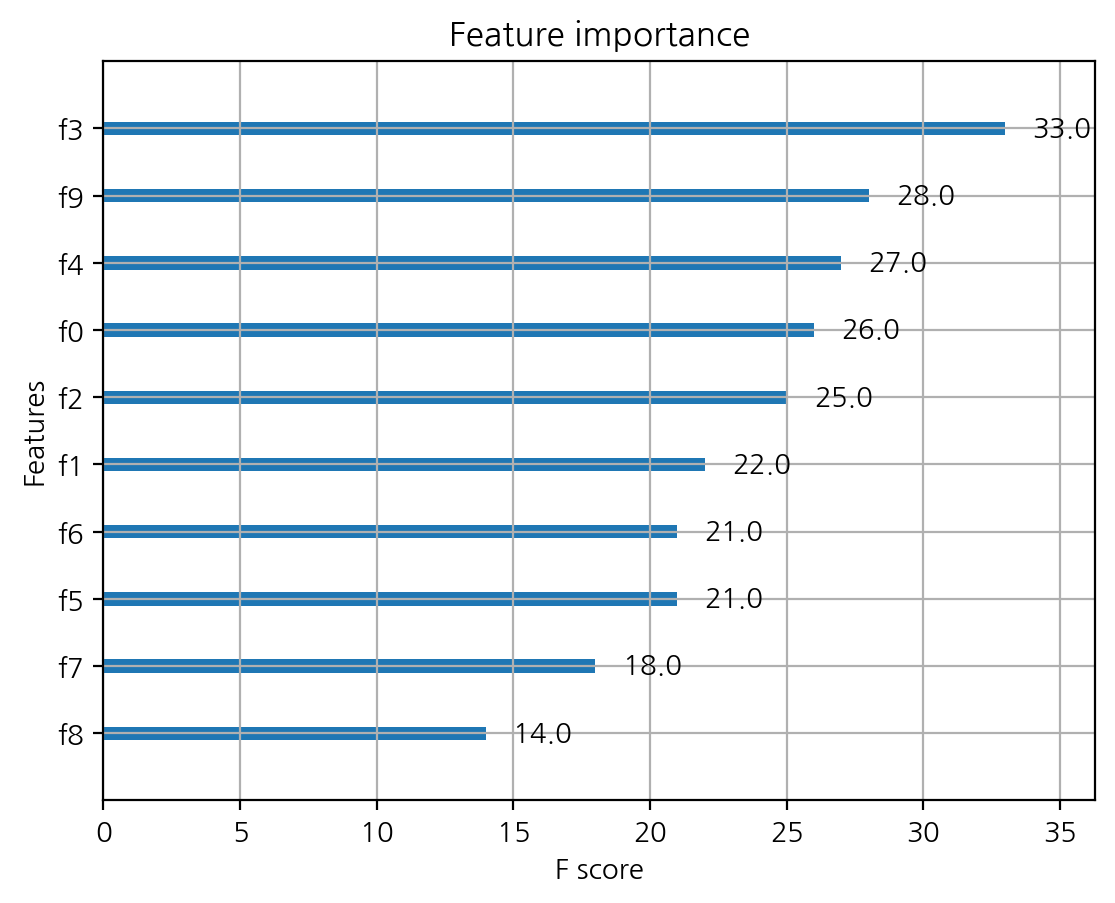

In [323]:
# xgb.plot_importance(model_xgb);

In [324]:
# from sklearn.metrics import r2_score
# r2_score(y_valid, y_valid_predict_xgb)

-0.13704819277108427

In [325]:
# score_xgb = model_xgb.score(X_valid_pca, y_valid)
# score_xgb

0.8887417218543047

In [329]:
# X_test_pca.shape

(12943, 10)

In [333]:
# # predict
# y_pred_xgb = model_xgb.predict(X_test_pca)
# y_pred_xgb[:5]

array([0, 0, 0, 1, 0])

## LightGBM

In [ ]:
# Best parameters found for LightGBM:  {'colsample_bytree': 0.7, 'learning_rate': 1, 'max_depth': 9, 'n_estimators': 166, 'num_leaves': 256, 'subsample': 1}
# F1 score on the test data for LightGBM: 0.4594

In [334]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(objective='binary', colsample_bytree=0.7, learning_rate=1, n_estimators=166,
max_depth=9, random_state=42, n_jobs=-1, subsample=1, num_leaves=256,
min_child_samples=27)

model_lgb
# eval_metrics = ["binary_logloss", "auc"]
# early_stopping = lgb.early_stopping(stopping_rounds=10, verbose=False)

# model_lgb.fit(X_train_pca, y_train, eval_set=[(X_valid_pca, y_valid)], eval_metric=eval_metrics,
# callbacks=[early_stopping])

LGBMClassifier(colsample_bytree=0.7, learning_rate=1, max_depth=9,
               min_child_samples=27, n_estimators=166, num_leaves=256,
               objective='binary', random_state=42, subsample=1)

In [336]:
# fit
model_lgb.fit(X_train_pca, y_train)

LGBMClassifier(colsample_bytree=0.7, learning_rate=1, max_depth=9,
               min_child_samples=27, n_estimators=166, num_leaves=256,
               objective='binary', random_state=42, subsample=1)

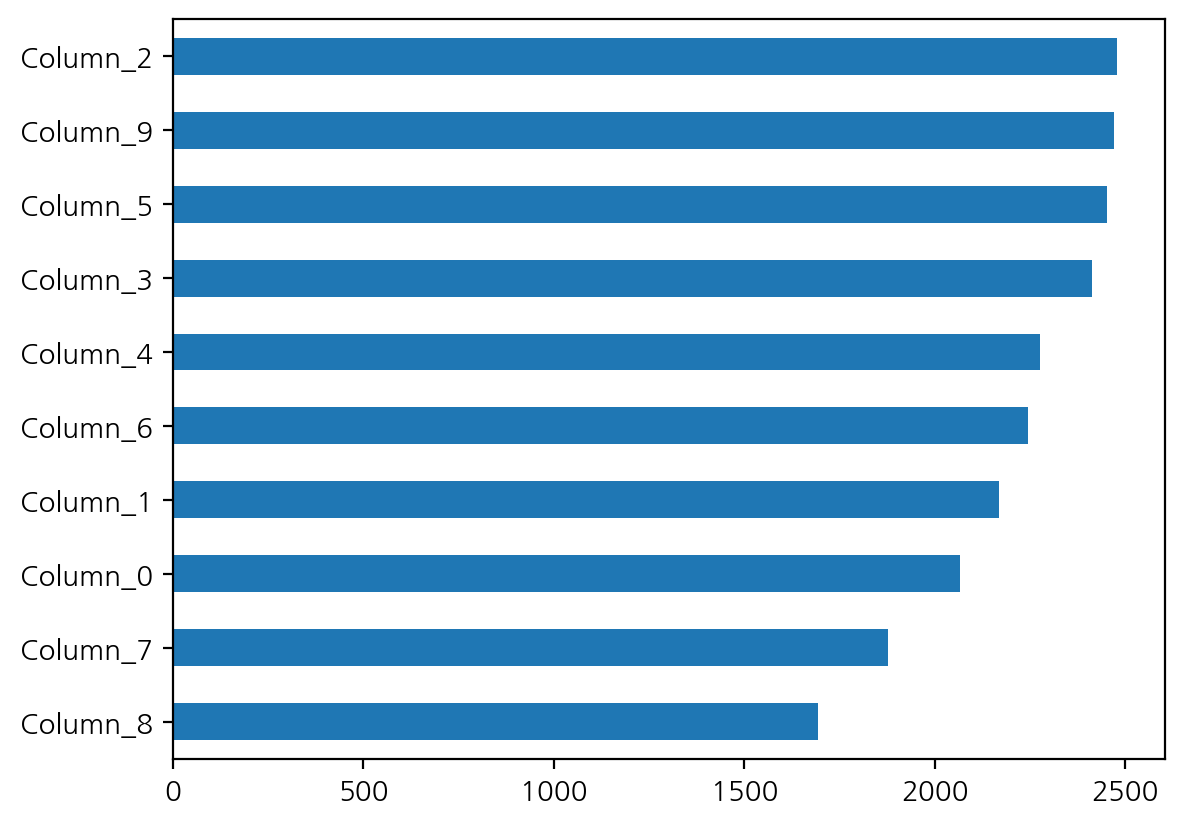

In [337]:
# 상위 피쳐만 가져와서 시각화하기
fi = pd.Series(model_lgb.feature_importances_)
fi.index =model_lgb.feature_name_
fi.nlargest(20).sort_values().plot.barh();

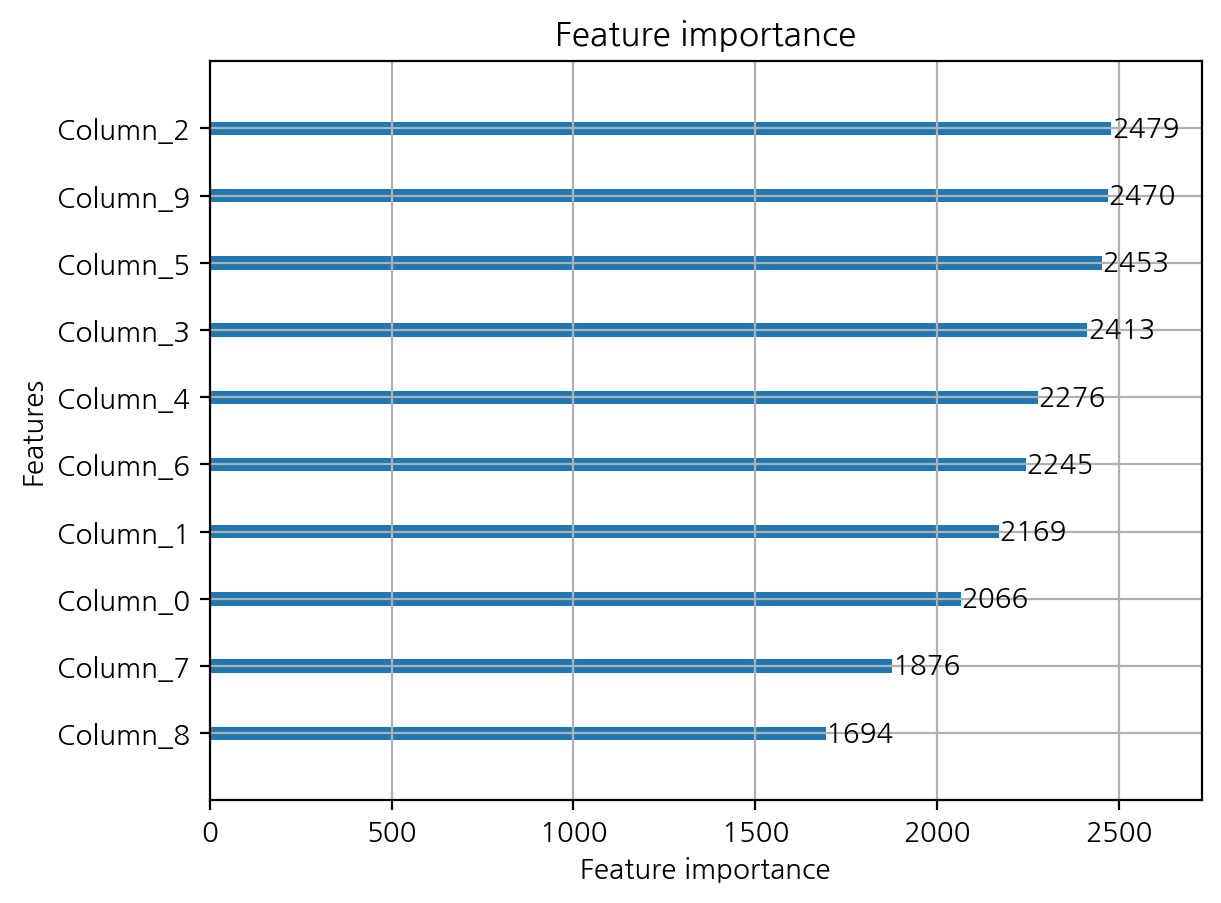

In [338]:
lgbm.plot_importance(model_lgb, max_num_features=20);

In [339]:
# valid score
score_lgb = model_lgb.score(X_valid_pca, y_valid)
score_lgb

0.8897350993377483

In [340]:
# predict
y_pred_lgb = model_lgb.predict(X_test_pca)
y_pred_lgb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## RandomForestEntr

### RFEtr용 랜덤서치cv

In [165]:
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier

param_dist_rf = {
'n_estimators': sp_randint(50, 200),
'max_depth': sp_randint(3, 10),
'min_samples_split': [2, 3, 4, 5],
'min_samples_leaf': [1, 2, 3],
'max_features': ['sqrt', 'log2'],
'bootstrap': [True, False]
}

rf = RandomForestClassifier()

search_rf = RandomizedSearchCV(
rf,
param_distributions=param_dist_rf,
n_iter=50,
scoring='f1',
n_jobs=-1,
cv=5,
verbose=1
)

search_rf.fit(X_train_pca, y_train)

print("Best parameters found for RandomForest: ", search_rf.best_params_)
print("F1 score on the test data for RandomForest: {:.4f}".format(search_rf.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found for RandomForest:  {'bootstrap': False, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 52}
F1 score on the test data for RandomForest: 0.0585


In [ ]:
# Fitting 5 folds for each of 50 candidates, totalling 250 fits
# Best parameters found for RandomForest:  {'bootstrap': False, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 52}
# F1 score on the test data for RandomForest: 0.0585

In [341]:
# RandomForestEntr은 scikit-learn 라이브러리의 RandomForestClassifier 모델과 거의 동일합니다. 
# 차이점은 노드 분할 시 사용되는 지니 불순도 대신 
# 엔트로피 불순도(Information Gain)를 사용한다는 것입니다.

model_rf = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=9, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=52)

model_rf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=9,
                       n_estimators=52)

In [350]:
# valid score
score_rf = model_rf.score(X_valid_pca, y_valid)
score_rf

0.8900662251655629

In [343]:
# predict
y_pred_rf = model_rf.predict(X_test_pca)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 피쳐 중요도 출력해보기

In [347]:
importance = model_xgb.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.08830
Feature: 1, Score: 0.06879
Feature: 2, Score: 0.10946
Feature: 3, Score: 0.09475
Feature: 4, Score: 0.10734
Feature: 5, Score: 0.06019
Feature: 6, Score: 0.15029
Feature: 7, Score: 0.07158
Feature: 8, Score: 0.16193
Feature: 9, Score: 0.08738


In [348]:
importance = model_lgb.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 2066.00000
Feature: 1, Score: 2169.00000
Feature: 2, Score: 2479.00000
Feature: 3, Score: 2413.00000
Feature: 4, Score: 2276.00000
Feature: 5, Score: 2453.00000
Feature: 6, Score: 2245.00000
Feature: 7, Score: 1876.00000
Feature: 8, Score: 1694.00000
Feature: 9, Score: 2470.00000


In [349]:
importance = model_rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.10460
Feature: 1, Score: 0.08967
Feature: 2, Score: 0.10414
Feature: 3, Score: 0.10289
Feature: 4, Score: 0.10266
Feature: 5, Score: 0.07558
Feature: 6, Score: 0.11890
Feature: 7, Score: 0.08851
Feature: 8, Score: 0.10908
Feature: 9, Score: 0.10396


# 제출

In [61]:
base_path = "../data/dacon"
submission = pd.read_csv(f'{base_path}/sample_submission.csv', index_col="ID")
print(submission.shape)
submission.columns

(12943, 1)


Index(['전화해지여부'], dtype='object')

In [62]:
# submit
submission['전화해지여부'] = y_pred_xgb
submission.head(2)

,전화해지여부
ID,
TEST_00000,0
TEST_00001,0


In [63]:
# 캐글에 제출
file_name = f'{base_path}/xgb2.csv'
submission.to_csv(file_name, index='ID')
pd.read_csv(file_name)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


In [403]:
submission = pd.read_csv(f'{base_path}/sample_submission.csv', index_col="ID")

submission['전화해지여부'] = y_pred_lgb
submission.head(2)
# 캐글에 제출
file_name = f'{base_path}/lgb.csv'
submission.to_csv(file_name, index='ID')
pd.read_csv(file_name)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0


In [404]:
submission = pd.read_csv(f'{base_path}/sample_submission.csv', index_col="ID")


submission['전화해지여부'] = y_pred_rf
submission.head(2)
# 캐글에 제출
file_name = f'{base_path}/rf.csv'
submission.to_csv(file_name, index='ID')
pd.read_csv(file_name)

,ID,전화해지여부
0,TEST_00000,0
1,TEST_00001,0
2,TEST_00002,0
3,TEST_00003,0
4,TEST_00004,0
...,...,...
12938,TEST_12938,0
12939,TEST_12939,0
12940,TEST_12940,0
12941,TEST_12941,0
